Vehicle Body Type & violation code-pie chart

In [14]:
import pandas as pd
import numpy as np
import matplotlib
import scipy.stats as stats

Import input data file

In [2]:
#Read the csv file
df=pd.read_csv("Resources\Parkingtickets_Dec2016.csv")
df

,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Violation Time,Violation County,From Hours In Effect,To Hours In Effect,Vehicle Color,Vehicle Year,Meter Number,Violation Post Code,Violation Description
0,GYG8911,NY,PAS,12/18/2016,24,SUBN,JEEP,1204P,Q,NaN,NaN,BK,2015,NaN,15 4,24-No Parking (exc auth veh)
1,8P82H,NY,OMT,12/21/2016,14,TAXI,NISSA,1015A,NY,ALL,ALL,YELLO,2014,-,NaN,NaN
2,GML6346,NY,PAS,12/19/2016,21,SDN,HONDA,1212P,K,1130A,0100A,GREY,2013,-,NaN,NaN
3,12203MG,NY,COM,12/1/2016,46,VAN,FRUEH,1137A,NY,ALL,ALL,BROWN,2015,-,NaN,NaN
4,HEG7444,NY,PAS,12/1/2016,36,4DSD,BMW,1027A,BK,NaN,NaN,BK,2016,NaN,NaN,PHTO SCHOOL ZN SPEED VIOLATION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30908,GCV1621,PA,PAS,12/25/2016,7,SDN,NISSA,0232P,QN,NaN,NaN,NaN,2014,NaN,NaN,FAILURE TO STOP AT RED LIGHT
30909,GVH3100,NY,PAS,12/5/2016,21,SUBN,FORD,0837A,Q,0830A,0900A,BK,2013,NaN,07 4,21-No Parking (street clean)
30910,GZK6941,NY,PAS,12/2/2016,36,4DSD,INFIN,0424P,QN,NaN,NaN,WH,2015,NaN,NaN,PHTO SCHOOL ZN SPEED VIOLATION
30911,GCL2009,NY,PAS,12/29/2016,7,SUBN,NISSA,1004A,QN,NaN,NaN,BK,2015,NaN,NaN,FAILURE TO STOP AT RED LIGHT


Dataset Observations

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30913 entries, 0 to 30912
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Plate ID               30913 non-null  object
 1   Registration State     30913 non-null  object
 2   Plate Type             30913 non-null  object
 3   Issue Date             30913 non-null  object
 4   Violation Code         30913 non-null  int64 
 5   Vehicle Body Type      30864 non-null  object
 6   Vehicle Make           30846 non-null  object
 7   Violation Time         30913 non-null  object
 8   Violation County       30838 non-null  object
 9   From Hours In Effect   13175 non-null  object
 10  To Hours In Effect     13175 non-null  object
 11  Vehicle Color          30423 non-null  object
 12  Vehicle Year           30913 non-null  int64 
 13  Meter Number           4499 non-null   object
 14  Violation Post Code    18098 non-null  object
 15  Violation Descripti

In [4]:
#This checks for missing value in dataframe - vehicle body type has 49 missing entries
pd.isnull(df).sum()

Plate ID                     0
Registration State           0
Plate Type                   0
Issue Date                   0
Violation Code               0
Vehicle Body Type           49
Vehicle Make                67
Violation Time               0
Violation County            75
From Hours In Effect     17738
To Hours In Effect       17738
Vehicle Color              490
Vehicle Year                 0
Meter Number             26414
Violation Post Code      12815
Violation Description     2743
dtype: int64

Data cleaning & sorting

In [5]:
#Delete unwanted column from df
del df['From Hours In Effect']
df.head()

,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Violation Time,Violation County,To Hours In Effect,Vehicle Color,Vehicle Year,Meter Number,Violation Post Code,Violation Description
0,GYG8911,NY,PAS,12/18/2016,24,SUBN,JEEP,1204P,Q,NaN,BK,2015,NaN,15 4,24-No Parking (exc auth veh)
1,8P82H,NY,OMT,12/21/2016,14,TAXI,NISSA,1015A,NY,ALL,YELLO,2014,-,NaN,NaN
2,GML6346,NY,PAS,12/19/2016,21,SDN,HONDA,1212P,K,0100A,GREY,2013,-,NaN,NaN
3,12203MG,NY,COM,12/1/2016,46,VAN,FRUEH,1137A,NY,ALL,BROWN,2015,-,NaN,NaN
4,HEG7444,NY,PAS,12/1/2016,36,4DSD,BMW,1027A,BK,NaN,BK,2016,NaN,NaN,PHTO SCHOOL ZN SPEED VIOLATION


In [6]:
#Delete unwanted column from df
del df['To Hours In Effect']
df.head()

,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Violation Time,Violation County,Vehicle Color,Vehicle Year,Meter Number,Violation Post Code,Violation Description
0,GYG8911,NY,PAS,12/18/2016,24,SUBN,JEEP,1204P,Q,BK,2015,NaN,15 4,24-No Parking (exc auth veh)
1,8P82H,NY,OMT,12/21/2016,14,TAXI,NISSA,1015A,NY,YELLO,2014,-,NaN,NaN
2,GML6346,NY,PAS,12/19/2016,21,SDN,HONDA,1212P,K,GREY,2013,-,NaN,NaN
3,12203MG,NY,COM,12/1/2016,46,VAN,FRUEH,1137A,NY,BROWN,2015,-,NaN,NaN
4,HEG7444,NY,PAS,12/1/2016,36,4DSD,BMW,1027A,BK,BK,2016,NaN,NaN,PHTO SCHOOL ZN SPEED VIOLATION


In [7]:
#Df with vehicle body type & violation code
vb=df.drop(['Registration State', 'Plate Type', 'Issue Date', 'Vehicle Make','Violation Time','Violation County','Vehicle Color', 'Vehicle Year','Meter Number','Violation Post Code', 'Violation Description'], axis=1)
vb

,Plate ID,Violation Code,Vehicle Body Type
0,GYG8911,24,SUBN
1,8P82H,14,TAXI
2,GML6346,21,SDN
3,12203MG,46,VAN
4,HEG7444,36,4DSD
...,...,...,...
30908,GCV1621,7,SDN
30909,GVH3100,21,SUBN
30910,GZK6941,36,4DSD
30911,GCL2009,7,SUBN


In [8]:
#Dropped empty rows
vb=vb.dropna()

In [9]:
#Combined certain body types
vb['Vehicle Body Type']=vb['Vehicle Body Type'].replace(['2 DR','2D','2DSD','2S'],'2DR')
vb['Vehicle Body Type']=vb['Vehicle Body Type'].replace(['4 DO', '4 DR', '4D', '4D H', '4DSD', '4DSE','4DSW','4H','4S','4SLE','4W'], '4DR')
vb

C:\Users\hrish\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\hrish\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Plate ID,Violation Code,Vehicle Body Type
0,GYG8911,24,SUBN
1,8P82H,14,TAXI
2,GML6346,21,SDN
3,12203MG,46,VAN
4,HEG7444,36,4DR
...,...,...,...
30908,GCV1621,7,SDN
30909,GVH3100,21,SUBN
30910,GZK6941,36,4DR
30911,GCL2009,7,SUBN


In [10]:
#Groupedby vehicle body type & violation code over plate ID
vc=vb.groupby(['Vehicle Body Type','Violation Code'])['Plate ID'].count().reset_index()
vc.columns=["Vehicle Body Type","Violation Code","Count"]
vc

,Vehicle Body Type,Violation Code,Count
0,2DR,5,12
1,2DR,7,47
2,2DR,9,8
3,2DR,14,40
4,2DR,16,7
...,...,...,...
619,WAGO,36,166
620,WDOO,62,1
621,WG,36,1
622,WRAN,5,1


In [11]:
vc.to_excel(r"Output\clean1.xlsx", index=False)

In [12]:
#calculate percentage of violations per body type. consider top violations, if % less than 1 or very low, then combine those values as others 

#count of total violations
totalviolations= vc['Count'].sum()
#print(f"Total Violations: {totalviolations}")

top_df = vc.groupby(['Vehicle Body Type'])['Count'].sum().reset_index()
print(top_df)

top_df['Percentage %'] = ((top_df['Count']*100)/totalviolations)

sorted_top_df = top_df.sort_values(by='Percentage %',ascending=False).reset_index()
sorted_copy = sorted_top_df

sorted_copy['Vehicle Body Type']=np.where(sorted_copy['Percentage %']<=5,'Others',sorted_copy['Vehicle Body Type'])

sorted_copy_grouped = sorted_copy.groupby(['Vehicle Body Type'])['Count'].sum().reset_index()
sorted_copy_grouped['Percentage %'] = ((sorted_copy_grouped['Count']*100)/totalviolations)
sorted_cleaned_copy_final = sorted_copy_grouped.sort_values(by='Percentage %',ascending=False).reset_index()
df=sorted_cleaned_copy_final.set_index('Vehicle Body Type')
df

   Vehicle Body Type  Count
0                2DR    738
1                 3D      1
2                4DR  10224
3                 5D      7
4                 5H      2
..               ...    ...
94              WAGO    216
95              WDOO      1
96                WG      1
97              WRAN      1
98                ZL      1

[99 rows x 2 columns]


,index,Count,Percentage %
Vehicle Body Type,,,
SUBN,2,12455,40.354458
4DR,0,10224,33.125972
Others,1,5236,16.964749
VAN,3,2949,9.554821


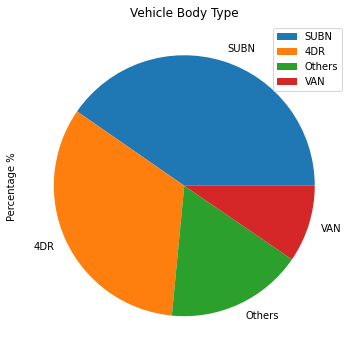

In [13]:
#Pie plot using dataframe
plot=df.plot.pie(y='Percentage %',figsize=(6,6), title=('Vehicle Body Type')).get_figure()

plot.savefig('Output/PieChart.png')